# Notebook 5B:  the Backpropagation method in neural Networks

Author: Christopher Monterola

Copyright © 2021 Christopher Monterola. All rights reserved.

This notebook is being written as part of a book on Deep Learning. None of the content here shall be reproduced and/or distributed without the written permission of the author. 

---

## Executive Summary

This notebook summarizes the basic mathematical principles  you need to understand to implement back-propagation in training neural networks, namely:   

1. Understanding sigmoid or step-like functions.
2. Using the gradient descent method for backpropagation.
3. Demonstration of backpropation method for a three-layer feedforward neural networks for both classification and regression problems.

Each of the above components are illustrated using examples. 


# 1. Sigmoid Functions


Sigmoid Functions are mathematical functions that follow the characteristic "S" curve. The function has many forms, but the most general form is the logistic equation given by:

\begin{equation}
f(x) = \frac{A}{1 + e^{-k(x-x_o)}}
\end{equation}

where $A$ is the maximum value, $x_o$ is the location of the midpoint, and $k$ is the steepness. In essence, sigmoids are defined by two horizontal asymptotes. This is why they are often used in learning curves, activation functions, and other growth models that exhibit an approximately exponential increase that saturates at a certain limit. 

![logistic-curve](https://user-images.githubusercontent.com/25600601/133036350-3270d0b3-c381-4a1d-a6ce-014e7feb2f54.png)




Other sigmoid functions include:

- hyperbolic tangent
- arc tangent
- error function
- generalised logistic function

![Gjl-t(x)](https://user-images.githubusercontent.com/25600601/133036472-0b528495-fd45-4d40-9407-888c6a81a7e4.png)

Sigmoid-like functions are the most used functions when training neural networks as (1) they provide good approximations to the step function (the characteristic distribution of an [*integrate-and-fire neuron*](https://en.wikipedia.org/wiki/Biological_neuron_model#Integrate-and-fire), and  (2) a sigmoid function has a **defined derivative** at the transition points. 

These two properties are important in the convergence of the so-called **gradient descent back-propagation method**, an optimization procedure that is arguably the most important mathematical procedure for training neural networks to learn patterns.

A *tour de force* in neural network involves finding the optimal sigmoid function defined as a function that will be able to **avoid local minima** and at the same time gives the **fastest convergence**. The exact function resulting from this long mathematical debate and countless simulations has the form:


\begin{equation}
f(x) = 1.7159 \tanh {\frac{2x}{3}}
\end{equation}


Eventually, series of numerical and theoretical analysis indicates that a Rectifield Linear Unit or RELU function creates a more generalizable result and faster convergence mainly because it **preserves information about relative intensities as compared to sigmoid like functions.** This is a breakthrough article in 2010 by [Nair and Hinton](https://www.researchgate.net/publication/221345737_Rectified_Linear_Units_Improve_Restricted_Boltzmann_Machines_Vinod_Nair) and an intuitive explanation for the above can be [sourced here](https://towardsdatascience.com/if-rectified-linear-units-are-linear-how-do-they-add-nonlinearity-40247d3e4792).



---
**Illustration 1: Building intuition on the Sigmoid Function** 

You have observed that the growth of a bacteria culture with limited nutrients is a logistic function. You find the equation for the growth to be:
\begin{equation}
f(t) = \frac{1000}{1 + e^{-0.5t+6}}
\end{equation}

where $t$ is the time in hours.

What is the population after 15 hours?

> Solving for t = 15,  

>$ f(15) = \frac{1000}{1 + e^{-0.5(15)+6}}$  

>$ f(15) = \frac{1000}{1 + e^{-1.5}} $  

>$ f(15) \approx{} 817.57 $

Implement the above calculation using numpy, see cell below, and validate by getting a value of 817.57.

In [1]:
## We're preloading all libraries used in this notebook

import random
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline
plt.rcParams['font.family'] = 'Times New Roman'

In [ ]:
# Define the variables here

A, k, x0, x = 1000, .5, 12, 15

sigmoid= A/(1+np.exp(-k*(x-x0)))

print(sigmoid)

817.5744761936436



---
**Illustration 2. Let's practice your derivatives**: 
    
Show that the derivative of f(x) = $\frac{1}{1 + e^{-k(x)}}$ can be written as f'(x)= k f(x) (1-f(x)).





# 2. Your first neural network using Newton's gradient descent method. 

Let us now combine everything you learned in the first session and the above properties of a sigmioid function to build your first neural network. Consider the figure below:

<img width="509" alt="neuron" src="https://user-images.githubusercontent.com/25600601/132207818-802ad5be-865c-40c2-bbd8-3da3e86b1217.png">




**STEP 1: Forward Propagation**

The functional mapping from inputs ($x_1, x_2$) to output $\Psi_{NN}$ is given by: 
   
   
$\Psi_{NN} = g(x_1, x_2) = g(w_1f(x_1) + w_2f(x_2))$
   
      
where $w_1$ and $w_2$ are the weights, $f$ and $g$ are the activation functions of the input and the output layers respectively.

If you want the system to learn a mapping from $\Psi_{NN}$ to $\Psi_{actual}$ then your goal is to minimize the error function $E$ given by:

**STEP 2: Define the error function**

\begin{equation}
E = \frac{1}{2} (\Psi_{NN} -\Psi_{actual})^2
\end{equation}
  

by updating or evolving $w_1$ and $w_2$.  Combining all the mathematics and numerical procedure you learn above, you can derive that the update rule should be:

**STEP 3: Implement Gradient Descent**

\begin{equation}
w_1^{t+1} = w_1^t - \gamma \frac{\partial E}{\partial w_1^t }
\end{equation}

\begin{equation}
w_2^{t+1} = w_2^t - \gamma \frac{\partial E}{\partial w_2^t }
\end{equation}

**STEP 4: Simplify the result**

\begin{equation}
w_1^{t+1} = w_1^t - \gamma(\Psi_{NN} -\Psi_{actual}) g'(x_1,x_2) f(x_1)
\end{equation}

\begin{equation}
w_2^{t+1} = w_2^t - \gamma(\Psi_{NN} -\Psi_{actual}) g'(x_1,x_2) f(x_2)
\end{equation}


noting that $g'(x) = g(x) (1-g(x))$, we get:

\begin{equation}
w_1^{t+1} = w_1^t - \gamma(\Psi_{NN} -\Psi_{actual})(g)(1-g)f(x_1)
\end{equation}

\begin{equation}
w_2^{t+1} = w_2^t - \gamma(\Psi_{NN} -\Psi_{actual})(g)(1-g)f(x_2)
\end{equation}

where $\gamma$ is referred to as the learning rate.



# Example 1. *Biased node*. Train the above two layer network to implement the following rules:   

| $x_1$ | $x_2$ | $\Psi_{actual}$ |
| --- | --- | --- |
|-1 | -1 | 0 |
|-1 | 1 | 1 |
| 1 | -1 | 0 |
| 1 | 1 | 1 |

that is, if $(x_1, x_2) = (1, 1)$ or (-1, 1) then $\Psi_{actual} =1$      
else if $(x_1, x_2) = (-1, -1)$ or (1, -1) then $\Psi_{actual} =0$


Shown below is a verbose code to explicitly demonstrate the backpropagation implementation.

In [ ]:
#INPUT OUTPUT MAPS
x1=[-1,-1,1,1]
x2=[-1,1,-1,1]
Psi_actual=[0,1,0,1]

#Initial weights and learning rate
cur_w1 = .01 
cur_w2= .01
gamma = .1
gradG_w1=0
gradG_w2=0

#PARAMETERS

iteration=0
total_iteration =50
error = []
weight1 = []
weight2= []

#ACTIVATION FUNCTIONS

def f(x):
    return x
def df(x):
    return 1
def g(x):
    return 1/(1+np.exp(-(x)))
def dg(x):
    return g(x)*(1-g(x))

#OUTPUT of the NN and the Error function
def Psi_NN(xx1, xx2, w1, w2):
    return g(w1*f(xx1)+w2*f(xx2))
def E(xx1,xx2, w1, w2, Psi_actual):
    return Psi_NN(xx1, xx2, w1, w2)-Psi_actual


while iteration < total_iteration:
    
    i= random.randint(0,3)
    prev_w1 = cur_w1 
    prev_w2 = cur_w2
    
    #ERROR TERM
    gradG_w1= E(x1[i],x2[i], cur_w1, cur_w2, Psi_actual[i])*dg(cur_w1*f(x1[i])+cur_w2*f(x2[i]))*f(x1[i])
    gradG_w2= E(x1[i],x2[i], cur_w1, cur_w2,Psi_actual[i])*dg(cur_w1*f(x1[i])+cur_w2*f(x2[i]))*f(x2[i])
    #print(cur_w1, cur_w2) #See how the weight evolves
 
    #RECORD THE ERROR AND THE WEIGHTS  
    error.append(abs(E(x1[i],x2[i], cur_w1, cur_w2,Psi_actual[i])))
    weight1.append(cur_w1)
    weight2.append(cur_w2)

    #BACKPROPAGATE THE ERROR
    cur_w1 -= gamma *gradG_w1
    cur_w2 -= gamma *gradG_w2
    NN = Psi_NN(x1[i], x2[i], cur_w1, cur_w2)
    
    #See how the mapping evolves
    print("iter=%d" %iteration, "x1=%d" % x1[i]," x2=%d" % x2[i] , "Psi_actual=%d" % Psi_actual[i],"Psi_NN=%.2f" %NN)
    iteration +=1

print("Total iteration=", iteration)

iter=0 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.46
iter=1 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.44
iter=2 x1=1  x2=1 Psi_actual=1 Psi_NN=0.59
iter=3 x1=1  x2=1 Psi_actual=1 Psi_NN=0.61
iter=4 x1=1  x2=1 Psi_actual=1 Psi_NN=0.64
iter=5 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.35
iter=6 x1=1  x2=-1 Psi_actual=0 Psi_NN=0.47
iter=7 x1=1  x2=-1 Psi_actual=0 Psi_NN=0.44
iter=8 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.33
iter=9 x1=1  x2=-1 Psi_actual=0 Psi_NN=0.41
iter=10 x1=1  x2=-1 Psi_actual=0 Psi_NN=0.39
iter=11 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.31
iter=12 x1=1  x2=-1 Psi_actual=0 Psi_NN=0.37
iter=13 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.30
iter=14 x1=1  x2=1 Psi_actual=1 Psi_NN=0.72
iter=15 x1=-1  x2=1 Psi_actual=1 Psi_NN=0.65
iter=16 x1=-1  x2=1 Psi_actual=1 Psi_NN=0.67
iter=17 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.27
iter=18 x1=1  x2=-1 Psi_actual=0 Psi_NN=0.31
iter=19 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.26
iter=20 x1=1  x2=1 Psi_actual=1 Psi_NN=0.75
iter=21 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.24
iter=22 x1=1  x2

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


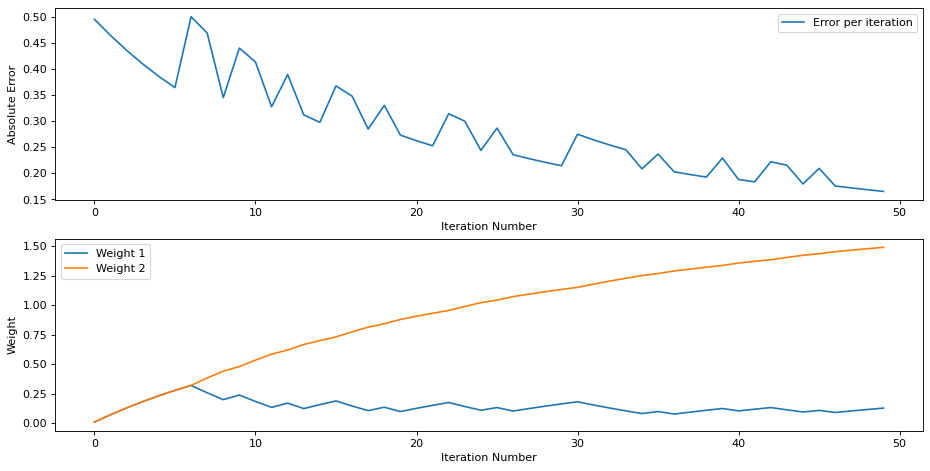

In [ ]:
figure(num=None, figsize=(14, 7), dpi=80, facecolor='w', edgecolor='k')

iteration_index = range(0, total_iteration)
plt.figure(1)

plt.subplot(211)    
plt.plot(iteration_index, error, label="Error per iteration")
plt.ylabel("Absolute Error")
plt.xlabel("Iteration Number")
plt.legend()

plt.subplot(212) 
plt.plot(iteration_index, weight1, label="Weight 1")
plt.plot(iteration_index, weight2, label="Weight 2")
plt.ylabel("Weight")
plt.xlabel("Iteration Number")
plt.legend()


plt.show()

### Now let us do this for different learning parameters ...

In [ ]:
#Biased
x1=[-1,-1,1,1]
x2=[-1,1,-1,1]
Psi_actual=[0,1,0,1]

#AND
#x1=[-1,-1,1,1]
#x2=[-1,1,-1,1]
#Psi_actual=[1,1,1,0]


#Initial weights and learning rate

gamma_param = [-.01, -.03, -.1, -.2, -.5]   # Learning rate
#gamma =-.2
gradG_w1=0
gradG_w2=0

#PARAMETERS
index=-1
index_total=5
total_iteration =15000
error_list = [[]for _ in range(index_total)]
weight1_list = [[]for _ in range(index_total)]
weight2_list= [[]for _ in range(index_total)]
Output_actual0= [[]for _ in range(index_total)]
Output_NN0= [[]for _ in range(index_total)]
Output_actual1= [[]for _ in range(index_total)]
Output_NN1= [[]for _ in range(index_total)]
Output_actual2= [[]for _ in range(index_total)]
Output_NN2= [[]for _ in range(index_total)]
Output_actual3= [[]for _ in range(index_total)]
Output_NN3= [[]for _ in range(index_total)]

def f(x):
    return x
def g(x):
    return 1/(1+np.exp(-(x)))
def df(x):
    return 1
def dg(x):
    return g(x)*(1-g(x))
def Psi_NN(xx1, xx2, w1, w2):
    return g(w1*f(xx1)+w2*f(xx2))
def E(xx1,xx2, w1, w2, Psi_actuall):
    return Psi_NN(xx1, xx2, w1, w2)-Psi_actuall

for gamma in gamma_param:
    index=index+1
    iteration=0
    cur_w1, cur_w2 =.01,.01
    while iteration < total_iteration:

        i= random.randint(0,3)
        prev_w1 = cur_w1 
        prev_w2 = cur_w2

        #ERROR TERM
        gradG_w1= E(x1[i],x2[i], cur_w1, cur_w2, Psi_actual[i])*dg(cur_w1*f(x1[i])+cur_w2*f(x2[i]))*f(x1[i])
        gradG_w2= E(x1[i],x2[i], cur_w1, cur_w2,Psi_actual[i])*dg(cur_w1*f(x1[i])+cur_w2*f(x2[i]))*f(x2[i])
        #print(cur_w1, cur_w2) #See how the weight evolves

        #RECORD THE ERROR AND THE WEIGHTS  
        
        #arr.append([])
        error_list[index].append(abs(E(x1[i],x2[i], cur_w1, cur_w2,Psi_actual[i])))
        weight1_list[index].append(cur_w1)
        weight2_list[index].append(cur_w2)
        
        if i==0:
            Output_NN0[index].append(Psi_NN(x1[i], x2[i], cur_w1, cur_w2))
            Output_actual0[index].append(Psi_actual[i])
        if i==1:
            Output_NN1[index].append(Psi_NN(x1[i], x2[i], cur_w1, cur_w2))
            Output_actual1[index].append(Psi_actual[i])     
        if i==2:
            Output_NN2[index].append(Psi_NN(x1[i], x2[i], cur_w1, cur_w2))
            Output_actual2[index].append(Psi_actual[i])   
        if i==3:
            Output_NN3[index].append(Psi_NN(x1[i], x2[i], cur_w1, cur_w2))
            Output_actual3[index].append(Psi_actual[i])   
            
        #print("error", error[index])
        #BACKPROPAGATE THE ERROR
        cur_w1 += gamma *gradG_w1
        cur_w2 += gamma *gradG_w2
        #NN = Psi_NN(x1[i], x2[i], cur_w1, cur_w2)


        #See how the mapping evolves
        #print("iter=%d" %iteration, "x1=%d" % x1[i]," x2=%d" % x2[i] , "Psi_actual=%d" % Psi_actual[i],"Psi_NN=%.2f" %NN)
        iteration +=1




## Error and change of weights VS iterations

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


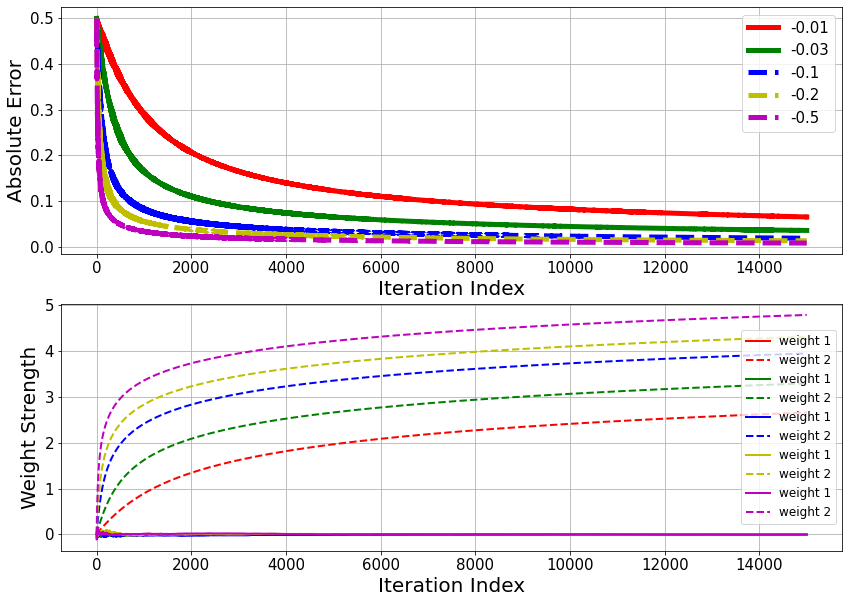

In [ ]:
iter = np.arange(0, total_iteration, 1)
iter2= np.arange(0, 20, 1)

main_canvas = plt.figure(figsize = (14, 10))
plot_canvas = plt.subplot(2, 1, 1)

attrib = ["r-", "g-", "b--", "y--", "m--"]
for i in range(5):
    plot_canvas.plot(iter, error_list[i], attrib[i], lw = 5, label=gamma_param[i])
plot_canvas.grid(True)
#plot_canvas.set_title("ERROR PLOT", size = 15)
plot_canvas.set_xlabel(r"Iteration Index", size = 20)
plot_canvas.set_ylabel(r"Absolute Error", size = 20)
plot_canvas.tick_params(axis = "both", which = "both", labelsize = 15)
plt.legend(fontsize=15);

plot_canvas = plt.subplot(2, 1, 2)

attrib = ["r-", "g-", "b-", "y-", "m-"]
attrib2 = ["r--", "g--", "b--", "y--", "m--"]
for i in range(5):
    plot_canvas.plot(iter, weight1_list[i], attrib[i], lw = 2, label="weight 1")
    plot_canvas.plot(iter, weight2_list[i], attrib2[i], lw = 2, label="weight 2")
plot_canvas.grid(True)
#plot_canvas.set_title("ERROR PLOT", size = 15)
plot_canvas.set_xlabel(r"Iteration Index", size = 20)
plot_canvas.set_ylabel(r"Weight Strength", size = 20)
plot_canvas.tick_params(axis = "both", which = "both", labelsize = 15)
plt.legend(fontsize=12);


### Let's look on how the NN evolve to copy the ideal output

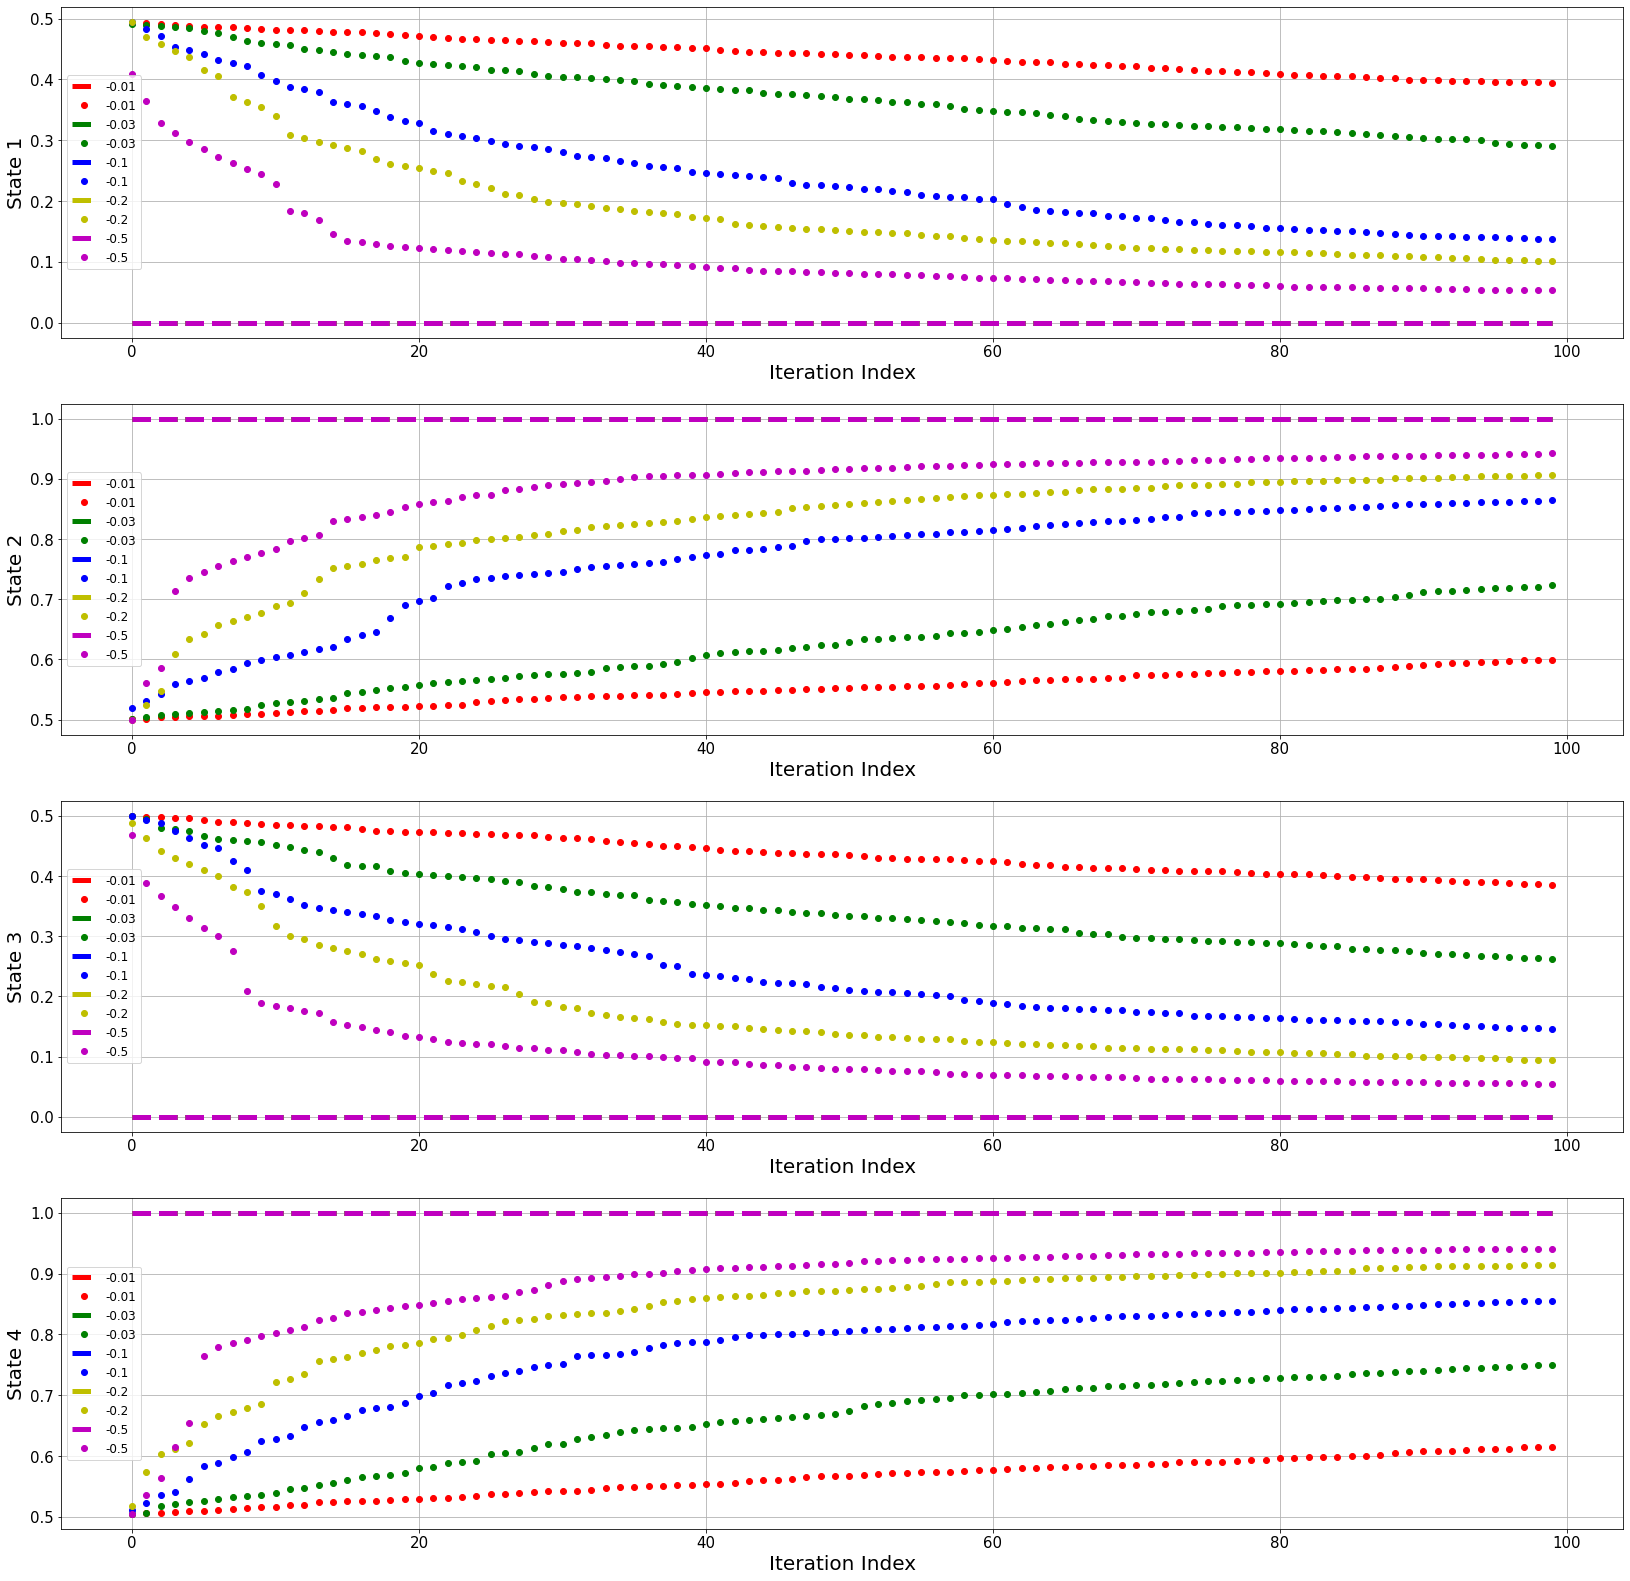

In [ ]:
iter = np.arange(0, total_iteration, 1)
plot_length=100

main_canvas = plt.figure(figsize = (28, 28))


plot_canvas = plt.subplot(4, 1, 1)

attrib = ["r--", "g--", "b--", "y--", "m--"]
attrib2 = ["ro", "go", "bo", "yo", "mo"]
for i in range(5):
    plot_canvas.plot(iter[:plot_length], Output_actual0[i][:plot_length], attrib[i], lw = 5, label=gamma_param[i])
    plot_canvas.plot(iter[:plot_length], Output_NN0[i][:plot_length], attrib2[i], lw = 2, label=gamma_param[i])
plot_canvas.grid(True)
#plot_canvas.set_title("ERROR PLOT", size = 15)
plot_canvas.set_xlabel(r"Iteration Index", size = 20)
plot_canvas.set_ylabel(r"State 1", size = 20)
plot_canvas.tick_params(axis = "both", which = "both", labelsize = 15)
plt.legend(fontsize=12);

plot_canvas = plt.subplot(4, 1, 2)

attrib = ["r--", "g--", "b--", "y--", "m--"]
attrib2 = ["ro", "go", "bo", "yo", "mo"]
for i in range(5):
    plot_canvas.plot(iter[:plot_length], Output_actual1[i][:plot_length], attrib[i], lw = 5, label=gamma_param[i])
    plot_canvas.plot(iter[:plot_length], Output_NN1[i][:plot_length], attrib2[i], lw = 2, label=gamma_param[i])
plot_canvas.grid(True)
#plot_canvas.set_title("ERROR PLOT", size = 15)
plot_canvas.set_xlabel(r"Iteration Index", size = 20)
plot_canvas.set_ylabel(r"State 2", size = 20)
plot_canvas.tick_params(axis = "both", which = "both", labelsize = 15)
plt.legend(fontsize=12);

plot_canvas = plt.subplot(4, 1, 3)

attrib = ["r--", "g--", "b--", "y--", "m--"]
attrib2 = ["ro", "go", "bo", "yo", "mo"]
for i in range(5):
    plot_canvas.plot(iter[:plot_length], Output_actual2[i][:plot_length], attrib[i], lw = 5, label=gamma_param[i])
    plot_canvas.plot(iter[:plot_length], Output_NN2[i][:plot_length], attrib2[i], lw = 2, label=gamma_param[i])
plot_canvas.grid(True)
#plot_canvas.set_title("ERROR PLOT", size = 15)
plot_canvas.set_xlabel(r"Iteration Index", size = 20)
plot_canvas.set_ylabel(r"State 3", size = 20)
plot_canvas.tick_params(axis = "both", which = "both", labelsize = 15)
plt.legend(fontsize=12);

plot_canvas = plt.subplot(4, 1, 4)

attrib = ["r--", "g--", "b--", "y--", "m--"]
attrib2 = ["ro", "go", "bo", "yo", "mo"]
for i in range(5):
    plot_canvas.plot(iter[:plot_length], Output_actual3[i][:plot_length], attrib[i], lw = 5, label=gamma_param[i])
    plot_canvas.plot(iter[:plot_length], Output_NN3[i][:plot_length], attrib2[i], lw = 2, label=gamma_param[i])
plot_canvas.grid(True)
#plot_canvas.set_title("ERROR PLOT", size = 15)
plot_canvas.set_xlabel(r"Iteration Index", size = 20)
plot_canvas.set_ylabel(r"State 4", size = 20)
plot_canvas.tick_params(axis = "both", which = "both", labelsize = 15)
plt.legend(fontsize=12);

---
# Example 2. (Home Exercise) *OR, AND, XOR*. Train the above two layer network to implement the following rules:   

| $x_1$ | $x_2$ | $\Psi_{actual}=AND$ | $\Psi_{actual}=OR$ |$\Psi_{actual}=XOR$ |
| --- | --- | --- | --- |--- |
|-1 | -1 | 0 | 0 |0 |
|-1 | 1 |  0|  1 |1 |
| 1 | -1 | 0 | 1 |1 |
| 1 | 1 | 1 |  1 |0 |


In [ ]:
no_inputs =2
no_output =1

w0 = 2*np.random.random((no_inputs,no_output)) - 1
w0

array([[0.40741572],
       [0.3581096 ]])

In [ ]:
print("w1 =", w0[0][0])
print("w2 =", w0[1][0])

w1 = 0.4074157210929552
w2 = 0.3581095989469649


In [ ]:
gamma=.01 # Learning Rate

# Activation function here
def nonlin(x,deriv=False):
    sigmoid=1/(1+np.exp(-x))
    if(deriv==True):
        return sigmoid*(1-sigmoid)
    return sigmoid
    
# input dataset
X = np.array([  [-1,-1],
                [-1,1],
                [1,-1],
                [1,1] ])
    
# output dataset            
y = np.array([[0,0,0,1]]).T

# seed random numbers to make calculation for reproducibility
#np.random.seed(30)

# initialize weights randomly with mean 0
w0 = 2*np.random.random((2,1)) - 1

for iter in range(100000):

    # forward propagation
    layer0 = X
    layer1 = nonlin(np.dot(layer0,w0))

    # Error Function
    layer1_error = y - layer1
    if (iter% 10000) == 0:
        print ("Error:=%.5f", np.mean(np.abs(layer1_error)))
    
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    layer1_delta = gamma*layer1_error * nonlin(np.dot(layer0,w0),True)

    # update weights
    w0 += np.dot(layer0.T,layer1_delta)

print ("\n Output After Training:")
print (layer1)
print ("\n Weights:")
print (w0)

Error:=%.5f 0.5769869124404006
Error:=%.5f 0.2692070342281888
Error:=%.5f 0.2632299178559864
Error:=%.5f 0.2606820196468952
Error:=%.5f 0.2591907125332043
Error:=%.5f 0.2581844134771554
Error:=%.5f 0.2574474010450921
Error:=%.5f 0.2568779427383172
Error:=%.5f 0.2564210176651285
Error:=%.5f 0.2560439447698354

 Output After Training:
[[0.01145193]
 [0.5       ]
 [0.5       ]
 [0.98854807]]

 Weights:
[[2.22904199]
 [2.22904199]]


## Problem with mapping,  Solution: Introduce a biased node =1.0 ! 

<img width="417" alt="neuron_biased" src="https://user-images.githubusercontent.com/25600601/133041404-f31eb5dd-93ad-4f15-ae98-12f53c87ded0.png">


In [ ]:
gamma=.01 # Learning Rate
no_inputs=3
no_output=1

# Activation function here
def nonlin2(x,deriv=False):
    sigmoid=1/(1+np.exp(-x))
    if(deriv==True):
        return sigmoid*(1-sigmoid)
    return sigmoid
 
    
# input dataset
X = np.array([  [1,-1,-1],
                [1,-1,1],
                [1,1,-1],
                [1,1,1] ])
    
# output dataset            
y = np.array([[0,0,0,1]]).T

# seed random numbers to make calculation for reproducibility
#np.random.seed(42)

# initialize weights randomly with mean 0
w0 = (2*np.random.random((no_inputs,no_output)) - 1)

for iter in range(100000):

    # forward propagation
    layer0 = X
    layer1 = nonlin(np.dot(layer0,w0))

    # Error Function
    layer1_error = y - layer1
    if (iter% 10000) == 0:
        print ("Error:=%.5f", np.mean(np.abs(layer1_error)))
    
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    layer1_delta = gamma*layer1_error * nonlin(np.dot(layer0,w0),True)

    # update weights
    w0 += np.dot(layer0.T,layer1_delta)

print ("\n Output After Training:")
print (layer1)
print ("\n Weights:")
print (w0)

Error:=%.5f 0.34340200935903964
Error:=%.5f 0.0601114086378762
Error:=%.5f 0.041253819169943876
Error:=%.5f 0.03316407212956263
Error:=%.5f 0.028439730821042328
Error:=%.5f 0.02526153004869143
Error:=%.5f 0.022940436229149402
Error:=%.5f 0.02115153109121259
Error:=%.5f 0.01971929580208236
Error:=%.5f 0.0185396389000667

 Output After Training:
[[1.37394118e-05]
 [2.33908231e-02]
 [2.33908231e-02]
 [9.76609177e-01]]

 Weights:
[[-3.73174812]
 [ 3.73174812]
 [ 3.73174812]]


---
# Example 3. Implement Biased, OR, AND and XOR using the architecture of the network below:

<img width="650" alt="NN3" src="https://user-images.githubusercontent.com/25600601/133038506-3975ca5f-09fe-4d15-ba7a-28bd437dadda.png">

A. Write the formulation from the inputs $x_1$ and $x_2$ to $\Phi_j$ to $\Psi_{NN}$. 


B. Implement OR, AND, XOR and try to understand the resulting values of the weights for each of the operation. 

# 3. Training a three layer feedforward Neural Network using the backpropagation method

Here we outline how to train a three layer feedforward neural network (input layer, single hidden layer, single output layer). 

<img width="676" alt="feedforwardNN2" src="https://user-images.githubusercontent.com/25600601/133038829-21dab3dd-ba10-4b72-83fe-ee05152b3838.png">




**Forward Propagation** The mapping from the feature $x_1, x2, ... x_N$  to the output $\Psi_{NN}$ can be written in the following steps:

STEP 1: Input to Hidden

\begin{equation}
\Phi_j= g(\sum_{i=1}^N f(x_i)w_{ij})
\end{equation}

where g(x) is the hidden activation function, $\Phi_j$ is the output of $j$th hidden node ($j = 1,2 ..., H$) and $N$ is the total number of input nodes.

STEP 2: Hidden to Output

\begin{equation}
\Psi_{NN}= h(\sum_{j=1}^H  v_{j} \Phi_j)
\end{equation}

where h(x) is the activation function of the output node.

**Backpropagation** As before the goal is to find the value of the weights $w_{ij}$ and $v_j$ that will reduce the error given by:

\begin{equation}
E=\frac{1}{2} (\Psi_{NN} - \Psi_{actual})^2
\end{equation}

and this is achieved via gradient descent method by updating the weights from hidden to output nodes by:

\begin{equation}
v_{j}^{t+1} = v_{j}^t - \gamma_1 \frac{\partial E}{\partial v_{j}^t} 
\end{equation}

while for the input to hidden nodes, 

\begin{equation}
w_{ij}^{t+1} = w_{ij}^t - \gamma_2 \frac{\partial E}{\partial w_{ij}^t} 
\end{equation}

where $\gamma_1$ and $\gamma_2$ are the learning rates input to hidden and hidden to output layers, respectively.

Further, the above gradients can be obtained by using implementing the *chain rule* that will result to the following:

Hidden to output

\begin{equation}
\frac{\partial E}{\partial v_{j}^t} = (\Psi_{NN} - \Psi_{actual}) \frac{\partial \Psi_{NN} }{\partial v_{j}^t} \\
     =(\Psi_{NN} - \Psi_{actual}) h'(\sum_{j=1}^H  v_{j} \Phi_j)\Phi_j 
\end{equation}

Input to Hidden

\begin{equation}
\frac{\partial E}{\partial w_{ij}^t} = (\Psi_{NN} - \Psi_{actual}) \frac{\partial \Psi_{NN} }{\partial w_{ij}^t} \\
     =(\Psi_{NN} - \Psi_{actual}) h'(\sum_{j=1}^H v_{j} \Phi_j) (v_j \frac{\partial \Phi_j}{\partial w_{ij}^t})
\\
    =  (\Psi_{NN} - \Psi_{actual}) h'(\sum_{j=1}^H v_{j} \Phi_j) (v_j g'(\sum_{i=1}^N f(x_i)w_{ij})) (f(x_i))
\end{equation}


 

# Example 4. Symmetry problem. Extend the problem above to the case of a 4 inputs given by the table below:

| $x_1$ | $x_2$ | $x_3$ | $x_4$ | $\Psi_{actual}$ |
| --- | --- | --- | --- | --- |
| 0 | 0 | 0 | 0 | 1 |
| 0 | 0 | 0 | 1 | 0 |
| 0 | 0 | 1 | 0 | 0 |
| 0 | 0 | 1 | 1 | 0 |
| 0 | 1 | 0 | 0 | 0 |
| 0 | 1 | 0 | 1 | 0 |
| 0 | 1 | 1 | 0 | 1 |
| 0 | 1 | 1 | 1 | 0 |
| 1 | 0 | 0 | 0 | 0 |
| 1 | 0 | 0 | 1 | 1 |
| 1 | 0 | 1 | 0 | 0 |
| 1 | 0 | 1 | 1 | 0 |
| 1 | 1 | 0 | 0 | 0 |
| 1 | 1 | 0 | 1 | 0 |
| 1 | 1 | 1 | 0 | 0 |
| 1 | 1 | 1 | 1 | 1 |

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = '/content/drive/MyDrive/Teaching/ML2_MSDS2022/'

In [18]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

os.path.isdir('C:\\Users\\JG\\jupyter directory\\datasets')

True

In [10]:
df_symmetry = pd.read_excel('C:\\Users\\JG\\jupyter directory\\datasets\\' + 'symmetry.xlsx', sheet_name='Sheet1')
dummy=df_symmetry
dummy.head()

,x1,x2,x3,x4,output
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,1,0
4,0,1,0,0,0


In [11]:
dummy.columns

Index(['x1', 'x2', 'x3', 'x4', 'output'], dtype='object')

C:\Users\JG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


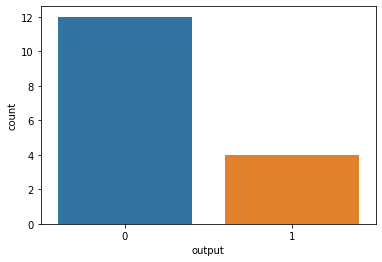

In [16]:
sns.countplot(df_symmetry['output'],label="Count")
plt.show()

In [19]:
feature_names = ['x1', 'x2', 'x3', 'x4']

X = df_symmetry[feature_names]
y = df_symmetry['output']

X.values
y=np.array(y, ndmin=2).T

In [21]:
X.head()

,x1,x2,x3,x4
0,0,0,0,0
1,0,0,0,1
2,0,0,1,0
3,0,0,1,1
4,0,1,0,0


In [24]:
y

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]], dtype=int64)

In [ ]:
gamma0=.1 #Input to Hidden
gamma1=.2 #Hidden to Output

no_hidden=3  #No of hidden nodes
no_inputs=4
no_outputs=1

def nonlin(x,deriv=False):
    sigmoid=1/(1+np.exp(-x))
    if(deriv==True):
        return sigmoid*(1-sigmoid)
    return sigmoid



np.random.seed(42)

# randomly initialize our weights with mean 0
w0 = 2*np.random.random((no_inputs,no_hidden)) - 1
w1 = 2*np.random.random((no_hidden,no_outputs)) - 1

print(w0)

for iter in range(30000):

	# Feed forward through layers 0, 1, and 2
    layer0 = X
    layer1 = nonlin(np.dot(layer0,w0))
    layer2 = nonlin(np.dot(layer1,w1))

    # Error Function
    layer2_error = y - layer2
    
    if (iter% 1000) == 0:
        print ("Error=", np.mean(np.abs(layer2_error)))
        
 #Gradients
    layer2_delta = layer2_error*nonlin(nonlin(np.dot(layer1,w1)),deriv=True)
    layer1_delta = layer2_delta.dot(w1.T)*nonlin(np.dot(layer0,w0),deriv=True)

    w1 += gamma1*layer1.T.dot(layer2_delta)
    w0 += gamma0*layer0.T.dot(layer1_delta)

print ("\n Output After Training:")
print (layer2)

[[-0.25091976  0.90142861  0.46398788]
 [ 0.19731697 -0.68796272 -0.68801096]
 [-0.88383278  0.73235229  0.20223002]
 [ 0.41614516 -0.95883101  0.9398197 ]]
Error= 0.45389149018381036
Error= 0.3467591203315007
Error= 0.23745199059527816
Error= 0.14324825996919135
Error= 0.10832318005882306
Error= 0.09281695985006912
Error= 0.08667276389202516
Error= 0.08384129706076053
Error= 0.08233014826842817
Error= 0.08112169956688145
Error= 0.07886757971536235
Error= 0.07316008464585194
Error= 0.066390049539198
Error= 0.060134491833586164
Error= 0.05471335174799424
Error= 0.05007652697936718
Error= 0.04610535452752067
Error= 0.042683786277440204
Error= 0.03971378007738445
Error= 0.03711610294663084
Error= 0.034827527201401434
Error= 0.03279760642975788
Error= 0.03098588619197582
Error= 0.02935968753796649
Error= 0.02789239869986795
Error= 0.026562170846900303
Error= 0.02535092236365717
Error= 0.024243575281280173
Error= 0.023227465865050236
Error= 0.022291886191474333

 Output After Training:
[[8.

In [ ]:
print (np.rint(layer2))

[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


#### Look at the confusion matrix

In [ ]:


output=np.rint(layer2)
confusion_matrix(output, y)

array([[12,  0],
       [ 0,  4]])

#### Evaluate some Test Set

In [ ]:
X1 = np.array([[1,0,1,1]])

layer0 = X1
layer1 = nonlin(np.dot(layer0,w0))
layer2 = nonlin(np.dot(layer1,w1))

print(layer2)

[[0.00129893]]


# Example 5. Real-world applications (finally!) The UP College Admission Test  (UPCAT) Prediction.

Here is the actual class performance of more than 1000 students who took the UPCAT. The information contains the grades of each of the students in English, Math, and Science and their general weighted averages from grades 7-9. An IQ test conducted by the school is also made available together with a confidentially measured variable abbreviated as SA.  

Explore how accurately can a three-layer feedforward neural network can forecast UPCAT passers (pass=1, fail=0). Determine the optimal learning rate and architecture for generalization with an 80:20 split.

In [ ]:
data_dir = '/content/drive/MyDrive/Teaching/ML2_MSDS2022/'

df_UPCAT = pd.read_excel(data_dir + 'UPCAT_DATA2.xlsx', sheet_name='AllData')
dummy = df_UPCAT
dummy.head()

,Batch,Eng7,Eng8,Eng9,Math7,Math8,Math9,Sci7,Sci8,Sci9,GWA7,GWA8,GWA9,UP,IQ,SA,C1,C2,Target
0,2005,77,82.0,86,94,87,92.0,84,80,92,1.4764,1.5045,1.4098,1,55.0,28,1,4.0,1
1,2005,57,57.0,59,55,46,57.0,53,45,53,2.6557,2.7000,2.7008,1,38.0,19,5,3.0,0
2,2005,55,52.0,55,57,53,51.0,57,62,51,2.6132,2.6818,2.7172,0,17.0,9,5,6.0,0
3,2005,69,78.0,78,87,79,79.0,83,82,79,1.7217,1.6136,1.7049,1,45.0,28,1,4.0,0
4,2005,64,71.0,68,71,57,54.0,60,59,55,2.4245,2.4318,2.4713,1,67.0,56,1,5.0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


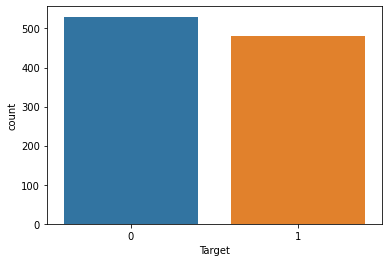

In [ ]:
sns.countplot(df_UPCAT['Target'],label="Count")
plt.show()

In [ ]:
dummy.columns

Index(['Batch', 'Eng7', 'Eng8', 'Eng9', 'Math7', 'Math8', 'Math9', 'Sci7',
       'Sci8', 'Sci9', 'GWA7', 'GWA8', 'GWA9', 'UP', 'IQ', 'SA', 'C1', 'C2',
       'Target'],
      dtype='object')

In [ ]:
feature_names = ['Eng7', 'Eng8', 'Eng9', 'Math7', 'Math8', 'Math9', 'Sci7',
       'Sci8', 'Sci9', 'GWA7', 'GWA8', 'GWA9', 'UP', 'IQ', 'SA', 'C1', 'C2']

X = df_UPCAT[feature_names]
y = df_UPCAT['Target']


In [ ]:
X.shape

(1010, 17)

In [ ]:
X.insert(loc=0, column='biased', value=1.0)

In [ ]:
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)



X_transition = pd.DataFrame(X)
X_clean = DataFrameImputer().fit_transform(X_transition)

X_clean.isnull().sum()

biased    0
Eng7      0
Eng8      0
Eng9      0
Math7     0
Math8     0
Math9     0
Sci7      0
Sci8      0
Sci9      0
GWA7      0
GWA8      0
GWA9      0
UP        0
IQ        0
SA        0
C1        0
C2        0
dtype: int64

In [ ]:
X_clean.shape

(1010, 18)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sscaler = MinMaxScaler()
X = sscaler.fit_transform(X_clean)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=217)

In [ ]:
y=np.array(y_train, ndmin=2).T

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

X=X_train
y=y

gamma1=.001 #Input to hidden
gamma2=.0001 #Hidden to Output

no_hidden=10  #No of hidden nodes
no_inputs=18

def nonlin(x,deriv=False):
    sigmoid=1/(1+np.exp(-x))
    if(deriv==True):
        return sigmoid*(1-sigmoid)
    return sigmoid



np.random.seed(42)

# randomly initialize our weights with mean 0
w0 = 2*np.random.random((no_inputs,no_hidden)) - 1
w1 = 2*np.random.random((no_hidden,1)) - 1

#print(w0)

for iter in range(10000):

	# Feed forward through layers 0, 1, and 2
    layer0 = X
    layer1 = nonlin(np.dot(layer0,w0))
    layer2 = nonlin(np.dot(layer1,w1))

    # Error Function
    layer2_error = y - layer2
    

    if (iter% 500) == 0:
        #Check here the results
        layer0_test = X_test
        layer1_test = nonlin(np.dot(layer0_test,w0))
        layer2_test = nonlin(np.dot(layer1_test,w1))
        output=np.rint(layer2_test)
        print ("Iteration No.=",iter, "Train Set Error =",accuracy_score(np.rint(layer2), y), "Test Set=", accuracy_score(output, y_test))

        
        
 #Gradients
    layer2_delta = layer2_error*nonlin(np.dot(layer1,w1),deriv=True)
    layer1_delta = layer2_delta.dot(w1.T)*nonlin(np.dot(layer0,w0),deriv=True)

    w1 += gamma2*layer1.T.dot(layer2_delta)
    w0 += gamma1*layer0.T.dot(layer1_delta)

#print ("\n Output After Training:")
#print (layer2)



Iteration No.= 0 Train Set Error = 0.5033025099075297 Test Set= 0.48616600790513836
Iteration No.= 500 Train Set Error = 0.8401585204755614 Test Set= 0.8221343873517787
Iteration No.= 1000 Train Set Error = 0.8441215323645971 Test Set= 0.8300395256916996
Iteration No.= 1500 Train Set Error = 0.8507265521796565 Test Set= 0.8458498023715415
Iteration No.= 2000 Train Set Error = 0.8546895640686922 Test Set= 0.849802371541502
Iteration No.= 2500 Train Set Error = 0.8533685601056803 Test Set= 0.8616600790513834
Iteration No.= 3000 Train Set Error = 0.8546895640686922 Test Set= 0.8695652173913043
Iteration No.= 3500 Train Set Error = 0.8586525759577279 Test Set= 0.8853754940711462
Iteration No.= 4000 Train Set Error = 0.8612945838837517 Test Set= 0.8853754940711462
Iteration No.= 4500 Train Set Error = 0.8652575957727873 Test Set= 0.8853754940711462
Iteration No.= 5000 Train Set Error = 0.8652575957727873 Test Set= 0.8853754940711462
Iteration No.= 5500 Train Set Error = 0.8652575957727873 T

In [ ]:
from sklearn.metrics import confusion_matrix

output=np.rint(layer2)
print(confusion_matrix(output, y_train))
print(accuracy_score(output, y_train))

[[345  44]
 [ 50 318]]
0.8758256274768824


In [ ]:
layer0 = X_test
layer1 = nonlin(np.dot(layer0,w0))
layer2 = nonlin(np.dot(layer1,w1))


In [ ]:
from sklearn.metrics import confusion_matrix


output=np.rint(layer2)
print("Confusion Matrix:")
print(confusion_matrix(output, y_test))

print("\n Accuracy:", accuracy_score(output, y_test))

Confusion Matrix:
[[118  11]
 [ 17 107]]

 Accuracy: 0.8893280632411067


Note that the above result is $\sim +3\%$ improvement from basic machine learning methods.

<img width="973" alt="UPCAT_ML1Results" src="https://user-images.githubusercontent.com/25600601/133045751-4fb3d1cd-3ff9-4877-9b01-344e66589f31.png">



#Example 6. Implement the above by combining the following activation functions : 

hidden =$\sin(x)$, output = $\frac{1}{1 + \exp(-x)}$  

See initial solution below as a guide.


In [ ]:
X=X_train
y=y

gamma1=.03 
gamma2=.01 #Hidden to output

no_hidden=18  #No of hidden nodes
no_inputs=18


def nonlin(x,deriv=False):
    function=np.sin(x)
    if(deriv==True):
        return np.cos(x)
    return function

def nonlin2(x,deriv=False):
    sigmoid=1/(1+np.exp(-x))
    if(deriv==True):
        return sigmoid*(1-sigmoid)
    return sigmoid



np.random.seed(64)

# randomly initialize our weights with mean 0
w0 = 2*np.random.random((no_inputs,no_hidden)) - 1
w1 = 2*np.random.random((no_hidden,1)) - 1

#print(w0)

for iter in range(10000):

	# Feed forward through layers 0, 1, and 2
    layer0 = X
    layer1 = nonlin(np.dot(layer0,w0))
    layer2 = nonlin2(np.dot(layer1,w1))

    # Error Function
    layer2_error = y - layer2
    
    if (iter% 500) == 0:
        #Check here the results
        layer0_test = X_test
        layer1_test = nonlin(np.dot(layer0_test,w0))
        layer2_test = nonlin2(np.dot(layer1_test,w1))
        output=np.rint(layer2_test)
        print ("Iteration No.=",iter, "Train Set Error =",accuracy_score(np.rint(layer2), y), "Test Set Error =", accuracy_score(output, y_test))

    
        
 #Gradients
    layer2_delta = layer2_error*nonlin2(np.dot(layer1,w1),deriv=True)
    layer1_delta = layer2_delta.dot(w1.T)*nonlin(np.dot(layer0,w0),deriv=True)

    w1 += gamma2*layer1.T.dot(layer2_delta)
    w0 += gamma1*layer0.T.dot(layer1_delta)

#print ("\n Output After Training:")
#print (layer2)



Iteration No.= 0 Train Set Error = 0.618229854689564 Test Set Error = 0.5849802371541502
Iteration No.= 500 Train Set Error = 0.892998678996037 Test Set Error = 0.8616600790513834
Iteration No.= 1000 Train Set Error = 0.8982826948480845 Test Set Error = 0.8616600790513834
Iteration No.= 1500 Train Set Error = 0.9075297225891678 Test Set Error = 0.857707509881423
Iteration No.= 2000 Train Set Error = 0.9101717305151915 Test Set Error = 0.849802371541502
Iteration No.= 2500 Train Set Error = 0.9141347424042272 Test Set Error = 0.83399209486166
Iteration No.= 3000 Train Set Error = 0.9299867899603699 Test Set Error = 0.8142292490118577
Iteration No.= 3500 Train Set Error = 0.9418758256274768 Test Set Error = 0.8260869565217391
Iteration No.= 4000 Train Set Error = 0.9458388375165125 Test Set Error = 0.8300395256916996
Iteration No.= 4500 Train Set Error = 0.9114927344782034 Test Set Error = 0.7984189723320159
Iteration No.= 5000 Train Set Error = 0.9471598414795245 Test Set Error = 0.8102

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
output=np.rint(layer2)
print(confusion_matrix(output, y_train))
print(accuracy_score(output, y_train))

[[390  13]
 [  5 349]]
0.9762219286657859


In [ ]:
layer0 = X_test
layer1 = nonlin(np.dot(layer0,w0))
layer2 = nonlin2(np.dot(layer1,w1))

In [ ]:
from sklearn.metrics import confusion_matrix

output=np.rint(layer2)
print(confusion_matrix(output, y_test))
print("Accuracy Test:", accuracy_score(output, y_test))

[[107  19]
 [ 28  99]]
Accuracy Test: 0.8142292490118577


# Example 7. NN as a regressor. Recall the Bike Sharing, predicting bike rental problem

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 



Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


Attribute Information:

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- count: count of total rental bikes including both casual and registered

The dataset was sourced from Hadi Fanaee of Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto , INESC Porto, Campus da FEUP, Rua Dr. Roberto Frias, 378, 4200 - 465 Porto, Portugal.  

Original Source: http://capitalbikeshare.com/system-data 
Weather Information: http://www.freemeteo.com 
Holiday Schedule: http://dchr.dc.gov/page/holiday-schedule


## First, our results using the **non-NN regressors previously implemented**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = '/content/drive/MyDrive/Teaching/ML2_MSDS2022/'

In [ ]:
df_bikesharing = pd.read_excel(data_dir + 'Bike_Sharing_day.xlsx', sheet_name="day")
dummy=df_bikesharing
dummy.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [ ]:
df_features=dummy.drop('count', axis=1)
df_features=df_features.drop('instant', axis=1)
df_features=df_features.drop('dteday', axis=1)
len(df_features)
df_features.head(5)

X = df_features
y = dummy['count']



##Run this if you want to scale the input and output 

'''yy=np.reshape(y, (-1,1))

from sklearn.preprocessing import MinMaxScaler
sscaler = MinMaxScaler()
X = sscaler.fit_transform(X)
y = sscaler.fit_transform(yy)'''




'yy=np.reshape(y, (-1,1))\n\nfrom sklearn.preprocessing import MinMaxScaler\nsscaler = MinMaxScaler()\nX = sscaler.fit_transform(X)\ny = sscaler.fit_transform(yy)'

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1 )


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#For purpose of Demonstration let's just use the default setting of the following models
LR = LinearRegression()
LR.fit(X_train, y_train)
Lasso = Lasso()
Lasso.fit(X_train, y_train)
Ridge1 = Ridge()
Ridge1.fit(X_train, y_train)
#kNN = KNeighborsRegressor(n_neighbors=8) 
kNN = KNeighborsRegressor() 
kNN.fit(X_train,y_train)
#SVR = Support Vecrtor Regression
SV=SVR(C=1.0, epsilon=0.2)
SV.fit(X_train,y_train)
#DT = DecisionTreeRegressor(max_depth=5) 
DT = DecisionTreeRegressor() 
DT.fit(X_train,y_train)
#RF = RandomForestRegressor(n_estimators = 100) 
RF = RandomForestRegressor() 
RF.fit(X_train,y_train)
#GBM = GradientBoostingRegressor(max_depth = 4, learning_rate=.1) 
GBM = GradientBoostingRegressor() 
GBM.fit(X_train,y_train)

y_pred_LR = LR.predict(X_test)
y_pred_Lasso = Lasso.predict(X_test)
y_pred_Ridge = Lasso.predict(X_test)
y_pred_kNN = DT.predict(X_test)
y_pred_SVR = SV.predict(X_test)
y_pred_DT = DT.predict(X_test)
y_pred_RF = RF.predict(X_test)
y_pred_GBM = GBM.predict(X_test)

cols = ['Machine Learning Regression Method','Train Accuracy', 'Test Accuracy']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = ['Linear Regression', LR.score(X_train, y_train), LR.score(X_test, y_test)]
df2.loc[1] = ['Linear Regression + Lasso', Lasso.score(X_train, y_train), Lasso.score(X_test, y_test)]
df2.loc[2] = ['Linear Regression + Ridge', Ridge1.score(X_train, y_train), Ridge1.score(X_test, y_test)]
df2.loc[3] = ['kNN', kNN.score(X_train, y_train), kNN.score(X_test, y_test)]
df2.loc[3] = ['Support Vector Regression', SV.score(X_train, y_train), SV.score(X_test, y_test)]
df2.loc[4] = ['Decision Tree',DT.score(X_train, y_train), DT.score(X_test, y_test)]
df2.loc[5] = ['Random Forest',RF.score(X_train, y_train), RF.score(X_test, y_test)]
df2.loc[6] = ['Gradient Boosting Method',GBM.score(X_train, y_train), GBM.score(X_test, y_test)]

df2




,Machine Learning Regression Method,Train Accuracy,Test Accuracy
0,Linear Regression,0.791145,0.814021
1,Linear Regression + Lasso,0.791025,0.814565
2,Linear Regression + Ridge,0.789780,0.815256
3,Support Vector Regression,0.013429,-0.038142
4,Decision Tree,1.000000,0.829545
5,Random Forest,0.980589,0.895245
6,Gradient Boosting Method,0.958539,0.891875


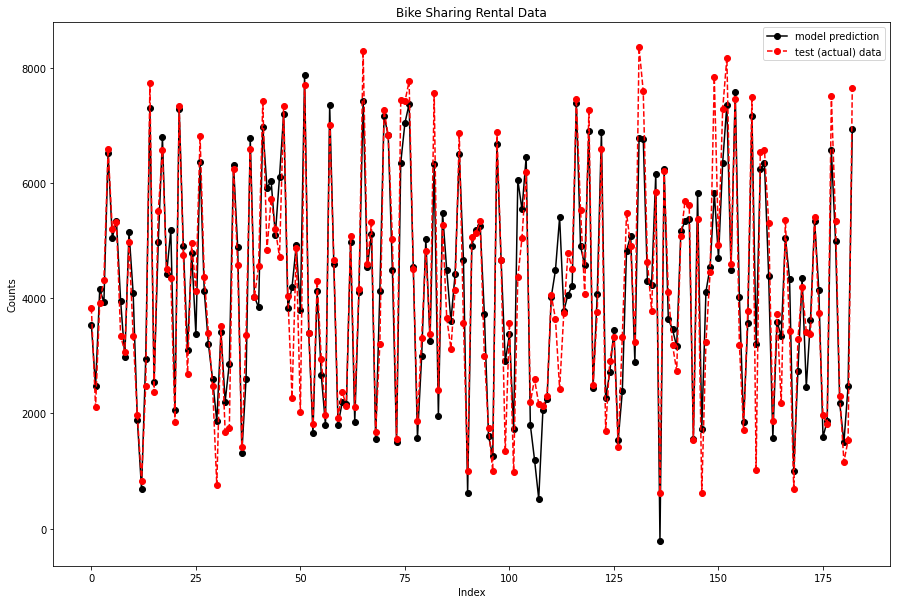

In [ ]:
fig = plt.figure(figsize=(15, 10))
number = np.arange(len(y_pred_GBM))

plt.plot(number,y_pred_GBM, "ko-", label="model prediction")
plt.plot(number,y_test, "ro--", label="test (actual) data")

plt.xlabel("Index")
plt.ylabel("Counts")
plt.title("Bike Sharing Rental Data")
plt.legend()

R2 score = 0.891875


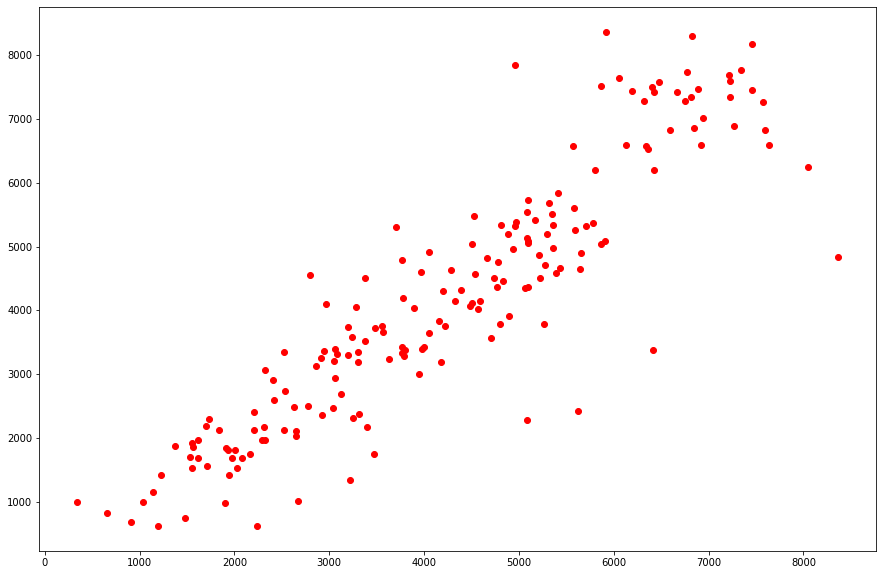

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

fig = plt.figure(figsize=(15, 10))
plt.scatter(y_pred_LR,y_test, c="r", label="test (actual) data")
print("R2 score = %f"%r2_score( y_test, y_pred_GBM))
#print(accuracy_score(y_pred_LR,y_test))

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1 )


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


param_grids = {'learning_rate': [.2, 0.1, 0.05, 0.02, 0.01],
              'max_depth': [3, 4, 6, 10, 14],
              'min_samples_leaf': [2, 3, 4],
              'max_features': [.5,.3, .2] 
}   

est = GradientBoostingRegressor(n_estimators=400)
gs_cv = GridSearchCV(est, param_grids, n_jobs=-1).fit(X_train, y_train)
print(gs_cv.best_params_)


{'learning_rate': 0.05, 'max_depth': 3, 'max_features': 0.2, 'min_samples_leaf': 2}


In [ ]:
y_GBM_gridsearch=gs_cv.predict(X_test)
gs_cv.score(X_test,y_test)

0.9077988437494454

# 4. Final Notes

Here are some of the main takeaways of our Backpropagation lecture:

1. Gradient-descent method is the most common method of supervised learning algorithms, from the basic regression methods to tree-based models like random forest and gradient boosting methods to neural network-based algorithms like perceptron networks and deep neural networks (Convolutional NN, LSTM, etc.).

2. Critical parameters demonstrated here include adding a bias node, choosing activation functions, and choosing architecture (number of layers/number of nodes). 

3. The mathematics of training a neural network has not evolved for generations. However, the algorithms have evolved exponentially. With better data (better resolution, better representation, more voluminous) and more powerful computers, NN-based AI is arguably one of the most disruptive technologies in Industry 4.0.  

# End.